# Identifier les colonnes qui contiennent une seule valeur
 - Les colonnes qui ont une seule observation ou valeur sont probablement inutiles pour la modélisation.
 - Lorsqu’un prédicteur contient une seule valeur, il est appelé prédicteur à variance nulle car il n’y a aucune variation affichée par le prédicteur.
    Ici, une valeur unique signifie que chaque ligne de cette colonne a la même valeur.
 - Vous pouvez détecter les lignes qui ont cette propriété en utilisant la fonction nunique() de Pandas qui indiquera  le nombre de valeurs uniques dans chaque colonne.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#La variance peut être utilisée comme un filtre pour
#identifier les colonnes à supprimer de l’ensemble de données. Une colonne qui
#a une seule valeur a une variance de 0.0, et une colonne qui a très peu de valeurs uniques peut avoir une petite variance.
#Danc La classe VarianceThreshold de la bibliothèque scikit-learn prend en charge ce type de sélection de caractéristiques.
from sklearn.feature_selection import VarianceThreshold

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# charger le fichier oil-spill.csv
data =pd.read_csv('/content/drive/MyDrive/Module_Cloud _Data_ Engineering /oil-spill.csv')
data

,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780,0.19,...,2850,1000,763.16,135.46,3.73,0.6,33243.19,65.74,7.95,1.1
0,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
1,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
2,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
3,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
4,6,54,1438.13,544.91,82,135000.0,44.67,6.92,1570.0,0.15,...,608.28,200.00,150.00,52.22,4.06,0,30967.25,65.77,7.85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
932,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
933,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
934,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


# Supprimer les colonnes qui contiennent une seule valeur
- Les colonnes sont relativement faciles à supprimer d'un  DataFrame Pandas.

- L'approche consiste à enregistrer toutes les colonnes qui ont une seule valeur unique, puis les supprimer en appelant la fonction drop()

In [5]:
# Comptez le nombre de valeurs uniques dans chaque colonne
unique_counts = data.nunique()

# Identifiez les colonnes avec une seule valeur unique
single_value_columns = unique_counts[unique_counts == 1].index


In [6]:
# Supprimez les colonnes avec une seule valeur unique
data = data.drop(columns=single_value_columns)

# Considérer les colonnes qui ont très peu de valeurs
- Dans la section précédente, nous avons vu que certaines colonnes de
l’exemple de jeu de données avaient très peu de valeurs.
- Par exemple, certaines colonnes n’avaient que 2, 4 et 9 valeurs uniques.
- En tant que tel, n’avoir que 2, 4 ou 9 valeurs numériques uniques dans une colonne peut être surprenant.
- Nous pouvons faire référence à ces colonnes ou prédicteurs comme des prédicteurs de variance proche de zéro, comme leur variance n’est pas nulle, mais un très petit nombre proche de zéro.

In [7]:

# Spécifiez un seuil de variance (par exemple, 0.01) en dessous duquel les colonnes seront supprimées
threshold = 0.01
# Créez un objet VarianceThreshold
selector = VarianceThreshold(threshold)
# Appliquez le sélecteur aux données
data_cleaned = selector.fit_transform(data)
# Transformez les données nettoyées en un DataFrame
data_cleaned = pd.DataFrame(data_cleaned, columns=data.columns[selector.get_support()])



In [8]:
data_cleaned

,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780,214.7,...,2850,1000,763.16,135.46,3.73,0.6,33243.19,65.74,7.95,1.1
0,2.0,22325.0,79.11,841.03,180.0,55812500.0,51.11,1.21,61900.0,901.7,...,5750.00,11500.00,9593.48,1648.80,0.60,0.0,51572.04,65.73,6.26,0.0
1,3.0,115.0,1449.85,608.43,88.0,287500.0,40.42,7.34,3340.0,86.1,...,1400.00,250.00,150.00,45.13,9.33,1.0,31692.84,65.81,7.84,1.0
2,4.0,1201.0,1562.53,295.65,66.0,3002500.0,42.40,7.97,18030.0,166.5,...,6041.52,761.58,453.21,144.97,13.33,1.0,37696.21,65.67,8.07,1.0
3,5.0,312.0,950.27,440.86,37.0,780000.0,41.43,7.03,3350.0,232.8,...,1320.04,710.63,512.54,109.16,2.58,0.0,29038.17,65.66,7.35,0.0
4,6.0,54.0,1438.13,544.91,82.0,135000.0,44.67,6.92,1570.0,86.0,...,608.28,200.00,150.00,52.22,4.06,0.0,30967.25,65.77,7.85,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,200.0,12.0,92.42,364.42,135.0,97200.0,59.42,10.34,884.0,110.0,...,381.84,254.56,84.85,146.97,4.50,0.0,2593.50,65.85,6.39,0.0
932,201.0,11.0,98.82,248.64,159.0,89100.0,59.64,10.18,831.0,107.2,...,284.60,180.00,150.00,51.96,1.90,0.0,4361.25,65.70,6.53,0.0
933,202.0,14.0,25.14,428.86,24.0,113400.0,60.14,17.94,847.0,133.9,...,402.49,180.00,180.00,0.00,2.24,0.0,2153.05,65.91,6.12,0.0
934,203.0,10.0,96.00,451.30,68.0,81000.0,59.90,15.01,831.0,97.5,...,402.49,180.00,90.00,73.48,4.47,0.0,2421.43,65.97,6.32,0.0


# Supprimer les 11 colonnes dont les valeurs uniques sont inférieures à 1% des lignes

In [9]:
# Calculez le pourcentage d'unicité pour chaque colonne
unique_percentage = data.apply(lambda col: col.nunique() / len(col))

In [10]:
# Identifiez les colonnes où le pourcentage d'unicité est inférieur à 1%
columns_to_remove = unique_percentage[unique_percentage < 0.01].index

In [11]:
# Supprimez ces colonnes du DataFrame
data = data.drop(columns=columns_to_remove)

# Supprimez les colonnes qui ont une faible variance
  - Une autre approche du problème de la suppression des colonnes ayant peu de valeurs uniques est de considérer la variance de la colonne.
- Rappelons que la variance est une statistique calculée sur une variable en
  tant que différence moyenne au carré des valeurs de l’échantillon par rapport à la moyenne.
- La variance peut être utilisée comme un filtre pour identifier les colonnes à supprimer de l’ensemble de données. Une colonne qui a une seule valeur a une variance de 0.0, et une colonne qui a très peu de valeurs uniques peut avoir une petite variance.
- La classe VarianceThreshold de la bibliothèque scikit-learn prend en charge ce type de sélection de caractéristiques.
- Une instance de la classe peut être créée et nous pouvons spécifier l’argument du seuil, qui a la valeur par défaut 0.0 pour éliminer les colonnes avec une seule valeur.
- Elle peut ensuite être ajustée et appliquée à un ensemble de données en appelant la fonction fit_transform() pour créer une version transformée de l’ensemble de données où les colonnes dont la variance est inférieure au seuil ont été supprimées automatiquement.

In [12]:
threshold = 0.01
selector = VarianceThreshold(threshold)

# Appliquez le sélecteur aux données
data_cleaned = selector.fit_transform(data)

# Transformez les données nettoyées en un DataFrame
data_cleaned = pd.DataFrame(data_cleaned)


In [13]:
# Obtenez les colonnes sélectionnées
selected_columns = data.columns[selector.get_support()]

In [14]:
# Mettez à jour le DataFrame d'origine avec les colonnes sélectionnées
data = data[selected_columns]



# Etendre cet exemple et voir ce qui se passe lorsque nous utilisons différents seuils. Nous pouvons définir une séquence de seuils de 0.0 à 0.5 avec un pas de 0.05, par exemple 0.0, 0.05, 0.1, etc.

In [16]:

# Créez une séquence de seuils de 0.0 à 0.5 avec un pas de 0.05
thresholds = [i/20 for i in range(21)]
# Créez une liste pour stocker le nombre de colonnes restantes à chaque seuil
remaining_columns_count = []
for threshold in thresholds:
    # Créez un objet VarianceThreshold avec le seuil actuel
    selector = VarianceThreshold(threshold)
    # Appliquez le sélecteur aux données
    data_cleaned = selector.fit_transform(data)
    # Comptez les colonnes restantes
    remaining_columns_count.append(data_cleaned.shape[1])

In [17]:
# Affichez le nombre de colonnes restantes pour chaque seuil
for i, threshold in enumerate(thresholds):
    print(f"Seuil {threshold}: {remaining_columns_count[i]} colonnes restantes")


Seuil 0.0: 35 colonnes restantes
Seuil 0.05: 30 colonnes restantes
Seuil 0.1: 29 colonnes restantes
Seuil 0.15: 29 colonnes restantes
Seuil 0.2: 29 colonnes restantes
Seuil 0.25: 29 colonnes restantes
Seuil 0.3: 29 colonnes restantes
Seuil 0.35: 29 colonnes restantes
Seuil 0.4: 29 colonnes restantes
Seuil 0.45: 27 colonnes restantes
Seuil 0.5: 26 colonnes restantes
Seuil 0.55: 26 colonnes restantes
Seuil 0.6: 26 colonnes restantes
Seuil 0.65: 26 colonnes restantes
Seuil 0.7: 26 colonnes restantes
Seuil 0.75: 25 colonnes restantes
Seuil 0.8: 25 colonnes restantes
Seuil 0.85: 25 colonnes restantes
Seuil 0.9: 25 colonnes restantes
Seuil 0.95: 25 colonnes restantes
Seuil 1.0: 25 colonnes restantes


# Tracer les résultats de la comparaison entre le seuil de variance et le nombre de caractéristiques sélectionnées

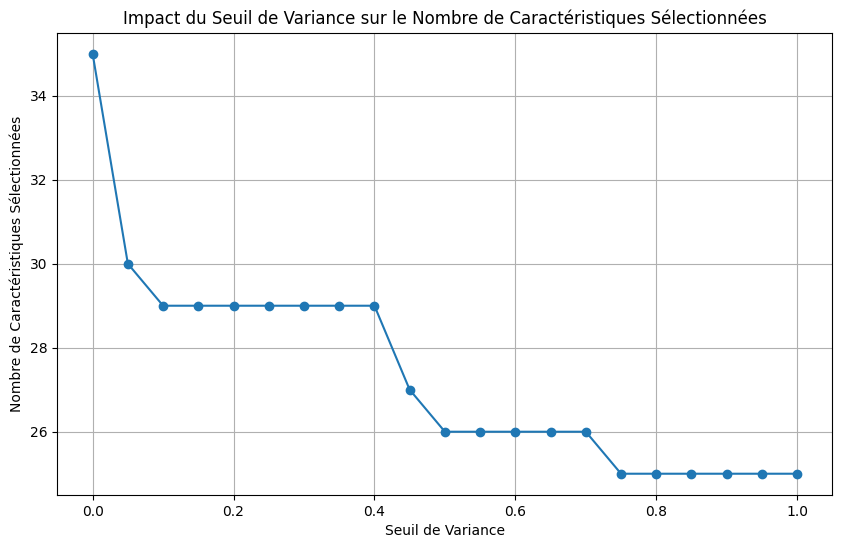

In [23]:

# Créez une séquence de seuils de 0.0 à 0.5 avec un pas de 0.05
thresholds = [i/20 for i in range(21)]

# Tracez le nombre de caractéristiques sélectionnées en fonction du seuil de variance
plt.figure(figsize=(10, 6))
plt.plot(thresholds, remaining_columns_count, marker='o', linestyle='-')
plt.xlabel("Seuil de Variance")
plt.ylabel("Nombre de Caractéristiques Sélectionnées")
plt.title("Impact du Seuil de Variance sur le Nombre de Caractéristiques Sélectionnées")
plt.grid(True)
plt.show()
